# Gravity

## Tips

Learn `Python` by going through the suggested online tutorials and the `PythonMinimum` notebook.

  * Python tutorials:
     * [A short introduction](https://realpython.com/python-first-steps/)
     * [A more complete introduction](https://www.w3schools.com/python/default.asp)
     * PythonMinimum
  * Use __esc r__ to disable a cell
  * Use __esc y__ to reactivate it
  * Use __esc m__ to go to markdown mode. **Markdown** is the typesetting language used in jupyter notebooks.
  * In a markdown cell, double tap the mouse or glide pad (on your laptop) to go to edit mode. 
  * Shift + return to execute a cell (including markdown cells).
  * If the equations don't typeset, try double tapping the cell again, and re-execute it.


## Goal

This notebook provides a gentle introduction to gravitational interactions.

## Newton's Law of Gravity

According to Newton, two objects of 1 and 2 or mass $m_1$ and $m_2$ at positions $\vec{r}_1$ and $\vec{r}_2$, respectively, experience a gravitational pull on each other of magnitude

\begin{align}
    G \frac{m_1 m_2}{|\vec{r}_1 - \vec{r}_2|^2}
\end{align}

where $G$ is Newton's gravitational constant. But force is a vector, so let's write the gravitational force of object 2 on object 1. Define the vector that starts at object 2 and ends on
object 1, $\vec{r} = \vec{r}_1 - \vec{r}_2$ as shown in the figure. 
<img src="fig07_2objects.png" align="left" alt="2-body system" width="300"/>
<br clear="right"/>
Also define the associated unit vector $\hat{r}$. Then the gravitational force of object 2 **on** object 1 can be written as

\begin{align}
    \vec{F}_g & = - \left( G \frac{m_1 m_2}{|\vec{r}|^2} \right) \hat{r},\\
    & = - \left( G \frac{m_1 m_2}{|\vec{r}|^2} \right) \frac{\vec{r}}{|\vec{r}|},\\
    & = - G \frac{m_1 m_2}{|\vec{r}|^3} \vec{r} .
\end{align}

Why is there a negative sign?

Newton did not understand how it was possible for one object to exert a gravitational force on another that is not in contact with it. An explanation was provided by Michael Faraday in the 1840s. Michael Faraday suggested that an object, for example the Sun, exerts a force on the Earth indirectly. The Sun creates a **gravitational field** around it that extends throughout space and it is the field at the location of the Earth that exerts the gravitational force on the Earth. Likewise the gravitational field of the Earth extends all the way to the Sun and the field at the Sun's location exerts a force on the Sun. Your gravitational field also extends all the way to the Sun and exerts a force on the Sun!

We can make this idea quantitative by noticing that we can write the force of object 2 on object 1 as follows

\begin{align}
    \vec{F}_g & = m_1 \vec{g}_1 ,
\end{align}

just as we did for the projectile motion problem. By comparing the above with the expression for the gravitational force, we see that the **gravitational field** $\vec{g}_1$ at the location of object 1 can be written as 

\begin{align}
    \vec{g}_1 & = - G \frac{m_2}{|\vec{r}|^3} \vec{r} .
\end{align}

If we want the gravitational force on object 1 due to objects 2, 3, $\cdots n$, we first add their gravitational fields 

\begin{align}
    \vec{g}_1 & = -G \sum_{j=2}^n \frac{m_j}{|\vec{r}_1 - \vec{r}_j|^3} (\vec{r}_1 - \vec{r}_j) ,
\end{align}

then multiply the total gravitational field $\vec{g}_1$ by the mass $m_1$. This must be done for each of the objects in turn. Therefore, for object $i$ we need to compute all the possible vector differences $\vec{r}_i - \vec{r}_j$ with $i \neq j$. 

In this exercise, and in the associated project, we'll assume that the orbital planes of the inner planets lie in the same plane. The initial positions of the planets will be taken to be their positions on 22 September 2024 as given in the table below. (The data were provided at this [website](https://eco.mtk.nao.ac.jp/cgi-bin/koyomi/cande/planet_ecliptic_en.cgi).)


| **planet** | **longitude** (deg) | **radius**  (au)| **speed** (deg/day) |
| :--        | :--           | :--             | :--                 |
| Mercury|152.26499|0.3513275|4.86195 |
| Venus|251.88011|0.7257176|1.59162|
| Earth|000.00000|1.0035870|0.98562|
| Mars|58.834830|1.4917856|0.54435|
| Jupiter|69.554680|5.0509857|0.08809|
| Saturn|346.51910|9.6606022|0.03265|
| Uranus|54.60613|19.5701169|0.01133|
| Neptune|358.53431|29.896918|0.00610|


Positions one day later (23 September 2024).

| **planet** | **longitude** (deg) | **radius**  (au)| **speed** (deg/day) |
| :--        | :--           | :--             | :--                 |
| Mercury|157.05017|0.3569830|4.70912|
| Venus|253.47147|0.7258350|1.59110|
| Earth|000.00000|1.0033129|0.98562|
| Mars|59.37871|1.4930812|0.54341|
| Jupiter|69.64277|5.0512854|0.08808|
| Saturn|346.55175|9.6603041|0.03265|
| Uranus|54.61746|19.5699504|0.01133|
| Neptune|358.54041|29.896892|0.00610|


The data above is relative to the **heliocentric coordinate system**
<img src="fig04_heliocentric.png" align="right" alt="heliocentric coordinate system" width="400"/>
The center of this coordinate system is near the center of the Sun. In fact, the origin of this coordinate system is (by [international agreement](https://en.wikipedia.org/wiki/International_Celestial_Reference_System_and_its_realizations)) at the center of mass of the Solar System.
<br clear="right"/>



## Numerical Solution of Newton's Second Law

Recall that Newton's second law of motion for a particle of mass $m$

$$\vec{F} = m \vec{a},$$ 

can be written as the two differential equations

\begin{align}
    \frac{d\vec{r}}{dt} & = \vec{v}, \\
    \frac{d\vec{v}}{dt} & = \frac{1}{m} \vec{F} .
\end{align}

The equations we used to get an approximate solution for the projectile problem are not accurate enough for our purposes. If you look at the notebook `exercises/02_taylor_series.ipynb`, you'll see the following, more accurate, equations for the position of objects,

\begin{align}
    \vec{r}(t + h) 
& = \color{blue}{\vec{r}(t) + \vec{v}(t) \, h  + \frac{1}{2} \frac{\vec{F}(t)}{m}  \, h^2} +  \left( \frac{\vec{F}(t) - \vec{F}(t - h) }{6 m}\right) \, h^2 + {\cal O}(h^4),
\end{align}

which is accurate to ${\cal O}(h^4)$. The formula for the velocity of an object is

\begin{align}
    \vec{v}(t + h) & = \color{blue}{\vec{v}(t) + \frac{\vec{F}(t)}{m}  \, h}  +  \left( \frac{\vec{F}(t) - \vec{F}(t - h) }{2 m}\right)   \, h + {\cal O}(h^3) ,
\end{align}

which is accurate to ${\cal O}(h^3)$.

Note that at $t = 0$, in general, we do not know the force at time $t = -h$. So a possible simulation strategy is to use the less accurate formulae (in blue) for timestamp $t = +h$ and thereafter use the more accurate ones.

### Import modules 
Make Python modules (that is, collections of programs) available to this notebook.


In [24]:
import os, sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# We'll use this to read in the planetary data, which are in CSV files.
import pandas as pd

%matplotlib inline

# update fonts
FONTSIZE = 12
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# use latex if available on system, otherwise set usetex=False
mp.rc('text', usetex=True)

# use JavaScript for rendering animations
mp.rc('animation', html='jshtml')

# set a seed to ensure reproducibility 
# on a given machine
seed = 314159
rnd  = np.random.RandomState(seed)

### Constants

In [48]:
D  = 24*3600.0           # Seconds per Earth day
Y  = 365.25*D            # Seconds per Earth year

Ms = 1.98850e30          # Mass of Sun (kg)
Mm = 0.33010e24          # Mass of Mercury (kg)
Mv = 4.86730e24          # Mass of Venus (kg)
Me = 5.97220e24          # Mass of Earth (kg)
Mr = 0.64169e24          # Mass of Mars (kg)
Mj = 1898.13e24          # Mass of Jupiter (kg)

R  = 1.495979e+11        # Astronomical unit (m)
G  = 6.67408e-11         # Gravitational constant (m^3 /kg /s^2)

SIZE = 2*R
h  = D/10                # Time increment in days
hh = h*h

class Bag:               # a very simple class (see PythonMinimum)
    pass
bag    = Bag()

### Read in planetary position data

We use the `pandas` module to read the planetary data which are in CSV files. `pandas` is an excellent module for reading and manipulating tables of data.

In [3]:
planets1 = pd.read_csv('planets-10-22-24.csv')
planets1

,planet,longitude,radius,speed
0,1,152.26499,0.351328,4.86195
1,2,251.88011,0.725718,1.59162
2,3,0.00000,1.003587,1.00000
3,4,58.83483,1.491786,0.54435
4,5,69.55468,5.050986,0.08809
5,6,346.51910,9.660602,0.03265
6,7,54.60613,19.570117,0.01133
7,8,358.53431,29.896918,0.00610


In [4]:
planets2 = pd.read_csv('planets-10-23-24.csv')
planets2

,planet,longitude,radius,speed
0,1,157.05017,0.356983,4.70912
1,2,253.47147,0.725835,1.59110
2,3,0.00000,1.003313,0.98562
3,4,59.37871,1.493081,0.54341
4,5,69.64277,5.051285,0.08808
5,6,346.55175,9.660304,0.03265
6,7,54.61746,19.569950,0.01133
7,8,358.54041,29.896892,0.00610


In [5]:
long1   = planets1['longitude'].to_numpy()
radius1 = planets1['radius'].to_numpy()
speed1  = planets1['speed'].to_numpy()

long2   = planets2['longitude'].to_numpy()
radius2 = planets2['radius'].to_numpy()
speed2  = planets2['speed'].to_numpy()

### Exercises

#### Problem 1
Add the masses (in kg in scientific notation) of all the inner planets to the list of Constants above. Use symbols such as `Mm` for Mercury, `Mv` for Venus, etc. 

####  Problem 2. 
Using the data above, and using the matplotlib function `ax.scatter(...)`, plot the predicted positions of the inner planets on 22 September 2024. Use different colored dots for the planets and make the large enough to be clearly visible. 

Assume that all planets lie in the $xy$-plane in the heliocentric coordinate system. (This is approximately true.)

#### Compute $(x, y)$ coordinates of planets

In [35]:
n   = 4  # 4 inner planets
rad = radius1[:n]
phi = long1[:n]
x   = rad * np.cos(phi)
y   = rad * np.sin(phi)
colors = ['magenta', 'orange', 'blue', 'red']

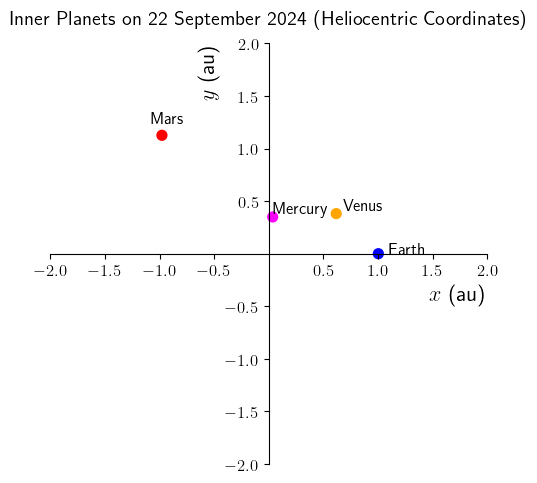

In [43]:
def plot_positions(x, y, colors, 
                   xmin=-2, xmax=2, ymin=-2, ymax=2, 
                   fgsize=(5,5), ftsize=16):
    
    # set size of figure
    fig = plt.figure(figsize=fgsize)

    # create area for a single plot 
    nrows, ncols, index = 1, 1, 1
    ax  = plt.subplot(nrows, ncols, index)

    ax.set_title('Inner Planets on 22 September 2024 (Heliocentric Coordinates)',
                  pad=14)
    
    # define graph domain, tick marks, and labels
    ax.set_xlim(xmin, xmax)
    ax.set_xticks(ticks=[-2.0, -1.5, -1, -0.5, 0.5, 1, 1.5, 2.0])
    ax.set_xlabel('$x$ (au)', loc='right', fontsize=ftsize)

    # define graph range, tick marks, and labels  
    ax.set_ylim(ymin, ymax)
    ax.set_yticks(ticks=[-2.0, -1.5, -1, -0.5, 0.5, 1, 1.5, 2.0])
    ax.set_ylabel('$y$ (au)', loc='top', fontsize=ftsize)
    
    # move left y-axis and bottom x-axis to center of plot
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
        
    # eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    ax.scatter(x, y, s=50, c=colors)
    
    text = ['Mercury', 'Venus', 'Earth', 'Mars']
    for X, Y, T in zip(x, y, text):
        X *= 1.1
        Y *= 1.1
        ax.text(X, Y, T)
    
    fig.tight_layout()

plot_positions(x, y, colors)

#### Problem 3.
Using the data above compute the position and velocity vectors for the inner planets in SI units (m, kg, s) units on 22 September 2024.
  

In [56]:
# compute position vectors
z = np.zeros(n)
r = np.array([x, y, z]).T

# compute velocities
# 1. first compute position of planets a day later
# 2. compute unit vector in direction of motion of planets
# 3. multiply by the speed of the planets

# 1.
rad2= radius2[:n]
phi2= long2[:n]
x2  = rad2 * np.cos(phi2)
y2  = rad2 * np.sin(phi2)
z2  = np.zeros(n)
r2  = np.array([x2, y2, z2]).T

# 2.
u   = norm(r2 - r)

# 3. convert speed in degrees/day to radians / s, then to m / s
speed = speed1[:n] * np.pi / 180 / D
speed = rad * R * speed
speed

# see explanation of broadcasting below
v = speed[:, np.newaxis] * u

# convert to units of meters
r *= R

# masses
m = np.array([Mm, Mv, Me, Mr])

print('masses (kg)\n', m)
print('positions (m)\n', r)
print('velocities (m/s)\n', v)

masses (kg)
 [3.3010e+23 4.8673e+24 5.9722e+24 6.4169e+23]
positions (m)
 [[ 5.36487477e+09  5.22833278e+10  0.00000000e+00]
 [ 9.24016105e+10  5.69954524e+10  0.00000000e+00]
 [ 1.50134508e+11  0.00000000e+00  0.00000000e+00]
 [-1.46374473e+11  1.68459095e+11  0.00000000e+00]]
velocities (m/s)
 [[ 34351.2360072  -38529.73346173      0.        ]
 [-34045.23551641   7702.51820564      0.        ]
 [-30328.0263849       0.              0.        ]
 [-13551.90997256 -20458.61975503      0.        ]]


#### Problem 4.
  Convert the position and velocities so that they are in astronomical units (au) and au/Earth year.

In [57]:
r /= R   # positions in AU
v /= R   # velocities in AU / s
v *= Y   # velocities in Au / Earth year

print('positions (au)\n', r)
print('velocities (au/Earth year)\n', v)

positions (au)
 [[ 0.03586197  0.34949239  0.        ]
 [ 0.61766649  0.38099099  0.        ]
 [ 1.003587    0.          0.        ]
 [-0.97845273  1.12607928  0.        ]]
velocities (au/Earth year)
 [[ 7.24637555 -8.12782744  0.        ]
 [-7.18182491  1.62484225  0.        ]
 [-6.39768155  0.          0.        ]
 [-2.85876843 -4.31573531  0.        ]]


### Cache results in bag

In [58]:
bag.m = m
bag.r = r
bag.v = v

### Computing net forces

Consider the *net* gravitational field at position $\vec{r}_i$, which is given by the expression

\begin{align}
    \vec{g}_i & = -G \sum_{j\neq i}^n \frac{m_j}{|\vec{r}_i - \vec{r}_j|^3} (\vec{r}_i - \vec{r}_j).
\end{align}

Given the net gravitational field at position $\vec{r}_i$, the gravitational force on an object of mass $m_i$ at that position is simply

\begin{align}
    \vec{F}_{g, i} & = m_i \vec{g}_i .
\end{align}

From the formula above, we see that we need to compute all vector differences $\vec{r}_{ij} = \vec{r}_i - \vec{r}_j$. Below, we give two ways of computing the net gravitational field, $\vec{g}_i$, at every position $\vec{r}_i$. 

Let's first create some test positions so that we can see how the calculation is done.

In [59]:
# create some random test position vectors and associated masses.

def create_test_positions(n=10):
    x = np.random.uniform(-10, 10, n)
    y = np.random.uniform(-10, 10, n)
    z = np.random.uniform(-10, 10, n)
    r = np.array([x,y,z]).T
    
    m = np.random.uniform(1, 100, n)

    return m, r

m, r = create_test_positions()

m.shape, m, r.shape, r

((10,),
 array([93.01718301, 27.73792764, 91.94070061, 26.52547129, 23.28208412,
        77.20133809, 82.73567292, 67.56248528,  6.04663072, 93.47572807]),
 (10, 3),
 array([[-2.36838215, -7.78551987, -0.12682506],
        [ 7.84224672, -8.68705482, -3.03899288],
        [ 0.6193135 ,  8.57653478, -7.52936492],
        [ 3.48322145,  2.80066211, -5.79855853],
        [ 7.46043087,  4.82375285,  5.80150341],
        [ 0.32354402, -5.28676684,  1.81737533],
        [ 3.09649535, -5.51202319, -2.80621205],
        [-7.13908333, -7.9112539 , -0.98304436],
        [-5.61823654,  6.28084026,  1.85150615],
        [ 2.25759973,  1.44615024, -6.10821679]]))

### Problem 5. 
Explain in detail the algorithm in the function magnitude. *Hint*: `axis=-1` means the last axis in an array. For example, in an array of shape $(l, m, n)$, `axis=-1` refers to the third axis of size $n$.

In [60]:
# the following function can operate on an array of vectors
def magnitude(v):
    return np.sqrt(np.sum(v*v, axis=-1))

### Problem 6.
Explain in detail the algorithm in the function norm. Why do we need to add a new axis?

In [61]:
# create a unit vector from the vector (or vectors) v
def norm(v):
    magv = magnitude(v)
    return v / magv[:, np.newaxis]

### `compute_forces1(m, r)`
Given the masses `m` and positions `r` of the objects (planets, etc.), compute the net gravitational force on each object by performing the double loop over positions ourselves. 

In [62]:
def compute_forces1(m, r):
    
    # this list will contain the net forces acting on
    # each particle
    f = []
    
    # loop over the positions of the particles.
    # use the "enumerate" construct so that we 
    # have access to the index "i" of each position (i = 0, 1,..., n-1)
    
    for i, ri in enumerate(r):
        
        # "gi" will be the net gravitational field at the position
        # of particle i
        gi = np.zeros(3)
        
        # loop over the positions of all other particles
        for j, rj in enumerate(r):
            
            if i == j: continue  # skip self-interactions
            
            # by convention, we compute the vector that points
            # from particle "j" to particle "i"
            rij = ri - rj
            
            # find its magnitude, that is, the scalar distance
            # between particles "i" and "j"
            magrij = magnitude(rij)
            
            # sum the gravitational fields at the location of particle "i".
            gi += m[j] * rij / magrij**3
            
        gi = -G * gi
        
        # compute net force on particle "i"
        fnet = m[i] * gi
        
        # cache net force
        f.append(fnet)
    
    # convert list of forces to a numpy array of forces
    return np.array(f)

F1 = compute_forces1(m, r)
F1.shape, F1

((10, 3),
 array([[ 1.46221844e-08,  2.63226590e-08,  1.46234510e-09],
        [-7.97587572e-09,  5.18977274e-09,  1.08213183e-09],
        [ 3.73468543e-09, -1.96399686e-08,  6.49161372e-09],
        [-3.44017268e-08, -3.58336206e-08, -6.79809801e-09],
        [-1.75788916e-09, -1.77753379e-09, -2.44897955e-09],
        [-1.22218560e-08, -1.38194503e-08, -3.25977870e-08],
        [-1.81051085e-08,  5.16487649e-09,  1.33651004e-08],
        [ 2.79664702e-08,  5.63456558e-09,  3.00310397e-09],
        [ 6.21649013e-10, -6.56389336e-10, -5.21718695e-10],
        [ 2.75174671e-08,  2.94150888e-08,  1.69622882e-08]]))

### `compute_forces2(m, r)`
Given the masses `m` and positions `r` of the objects (planets, etc.), compute the net gravitational force on each object, this time using the `numpy` **broadcasting** mechanism. 

#### Broadcasting
You had a brief introduction to broadcasting in Project 1. Here we give a more detailed explanation of this very powerful idea. As always, it is easiest to explain the idea with an example.

Suppose we have four planets at position vectors $\vec{r}_1$, $\vec{r}_2$, $\vec{r}_3$, and $\vec{r}_4$ that are interacting gravitationally. To compute the net gravitional force on each planet due to the other three, we need to compute all the possible differences between the vectors $\vec{r}_1$, $\vec{r}_2$, $\vec{r}_3$, and $\vec{r}_4$. To that end, let's put the vectors into an array: $r = (\vec{r}_1, \vec{r}_2, \vec{r}_3,\vec{r}_4)$. When represented as a *numpy* array, the *shape* of the array would be $(4, 3)$, that is, an array with 4 rows each with 3 columns since each vector is represented by an array of length 3. However, for now, it is simpler  to think of $r$ as simply an array of 4 objects, namely, $\vec{r}_1$, $\vec{r}_2$, $\vec{r}_3$, and $\vec{r}_4$.

The key point to understand about *numpy* is that most array operations are performed element-by-element. Therefore, it is necessary that arrays be of the same shape. The shape of an array is specified by how many axes it has and the length of the array along each axis. For example, an array of shape (3,2,5) has three axes, `axis 0` of length 3, `axis 1` of length 2 and `axis 2` of length 5. One can think of `axis 0` as defining the rows, `axis 1` the columns and `axis 2` as a third axis perpendicular to the rows and columns. Two arrays A and B can be made the same shape by replicating array elements along the relevant axes if the arrays are compatible. Numpy decides whether two arrays are compatible using the following rules.
  1. Starting from the rightmost axis compare the length of the two axes.
  1. If the lengths are the same or if one axis is of length 1 then these two axes are compatible.
  1. The arrays are compatible if all axes are compatible.

For example, if array A is of shape (1, 10, 3) and array B is of shape (5, 1, 3) they are compatible according to the *numpy* rules. This is because the sub-array of array A, of shape (10, 3), can be replicated along `axis 0` 5 times to make A of shape (5, 10, 3). Similarly, the sub-array of B of shape (5, 3) can be replicated along `axis 1` 10 times to make B also of shape (5, 10, 3). Now that both arrays are of the same shape it is possible to perform element-by-element operations on them. On the other hand if B were of shape (5, 4, 3), A and B would not be compatible according to *numpy*'s rules. Broadcasting is a powerful mechanism, but it requires some practice to learn how to use it effectively. Let's apply broadcasting to the problem at hand. 

To compute the gravitational fields,
\begin{align}
    \vec{g}_i & = -G \sum_{j \neq i}^n \frac{m_j}{|\vec{r}_i - \vec{r}_j|^3} (\vec{r}_i - \vec{r}_j),
\end{align}
and, therefore, the net gravitational force at the location of each planet, we need to 
 perform element-by-element subtraction of the position vectors. Specifically, we need to create two arrays of vectors that can be subtracted element-by-element as follows
\begin{align}
    \begin{pmatrix}
        \vec{r}_1 - \vec{r}_1 & \vec{r}_2 - \vec{r}_1 & \vec{r}_3 - \vec{r}_1 & \vec{r}_4 - \vec{r}_1\\
        \vec{r}_1 - \vec{r}_2 & \vec{r}_2 - \vec{r}_2 & \vec{r}_3 - \vec{r}_2 & \vec{r}_4 - \vec{r}_2\\
        \vec{r}_1 - \vec{r}_3 & \vec{r}_2 - \vec{r}_3 & \vec{r}_3 - \vec{r}_3 & \vec{r}_4 - \vec{r}_3\\
        \vec{r}_1 - \vec{r}_4 & \vec{r}_2 - \vec{r}_4 & \vec{r}_3 - \vec{r}_4 & \vec{r}_4 - \vec{r}_4\\
    \end{pmatrix}
    & = 
    \begin{pmatrix}
        \vec{r}_1 & \vec{r}_2 & \vec{r}_3 & \vec{r}_4\\
        \vec{r}_1 & \vec{r}_2 & \vec{r}_3 & \vec{r}_4\\
        \vec{r}_1 & \vec{r}_2 & \vec{r}_3 & \vec{r}_4\\
        \vec{r}_1 & \vec{r}_2 & \vec{r}_3 & \vec{r}_4\\
    \end{pmatrix}
    -
    \begin{pmatrix}
        \vec{r}_1 & \vec{r}_1 & \vec{r}_1 & \vec{r}_1\\
        \vec{r}_2 & \vec{r}_2 & \vec{r}_2 & \vec{r}_2\\
        \vec{r}_3 & \vec{r}_3 & \vec{r}_3 & \vec{r}_3\\
        \vec{r}_4 & \vec{r}_4 & \vec{r}_4 & \vec{r}_4\\
    \end{pmatrix}       
\end{align}
to give the result on the lefthand side. We then divide each difference vector by the cube of its magnitude and scale the result by $-G m_j$, where $m_j$ is the mass of planet $j$ and $G$ is Newton's gravitational constant. This will result in a $4 \times 4$ array of gravitational fields. We then sum the gravitional fields along `axis 0` to get the net field at each planet and, finally, we multiply the net field by $m_i$ to compute the net gravitational force on planet $i$ of mass $m_i$.

To perform the above calculation requires the array $r$ to be changed to a 2D array of shape (1, 4), where each element of the 2D array is a vector, and then replicated in the direction of `axis 0`, that is, in the direction of increasing row number so that when viewed as a *numpy* array, the array $r$ has shape (1, 4, 3). We also need another version of $r$ that is changed to a 2D array of shape (4, 1) and replicated in the direction of `axis 1`, that is, in the direction of increasing column number to give an overall shape of (4, 1, 3) when $r$ is viewed as a *numpy* array. In other words, we need one version of $r$ in which a new `axis 0` of length 1 is inserted *before* the current axis 0 using the syntax 
```python
    ri = r[np.newaxis, :]
```
which creates an array of shape (1, 4, 3) and another version of $r$ in which a new `axis 1` is inserted *after* the existing axis 0 using the syntax
```python
    rj = r[:, np.newaxis]
```
which creates an array of shape (4, 1, 3), where the ":" represents an axis.

In [63]:
def compute_forces2(m, r):
    
    # initial shapes of arrays m (masses) and r (position vectors)
    # m.shape: (n, )
    # r.shape: (n, 3)
    
    ri = r[np.newaxis, :]    # change shape from (n, 3) to (1, n, 3)
    rj = r[:, np.newaxis]    # change shape from (n, 3) to (n, 1, 3)
    
    # compute all possible vector differences using broadcasting:
    # 1. the row (1, n, 3) with n columns, each element of which 
    #    is a 3-vector, is replicated vertically n times to form 
    #    an array of shape (n, n, 3)
    #
    # 2. the column (n, 1, 3) with n rows, each element of which 
    #    is a 3-vector, is replicated horizontally n times to form
    #    an array of shape (n, n, 3).
    #
    # 3. now that we have arrays of the same shape, we can perform 
    #    element-by-element subtractions.
    #
    # note: the vectors along the diagonal are all zero-length vectors (see above)
    rij= ri - rj            # shape: (n, n, 3)
    
    # magrij has shape (n, n) 
    magrij = magnitude(rij)
    
    # for the magnitudes, replace the zeros along the diagonal
    # with ones. why must we do this in this function but not
    # in compute_forces1?
    np.fill_diagonal(magrij, 1)
        
    # why must we change the shape of the magnitudes array?
    magrij = magrij[:, :, np.newaxis]  # change shape to (n, n, 1)
    
    # why must we change the shape of the mass array?
    mj = m[:, np.newaxis, np.newaxis]  # change shape from (n, ) to (n, 1, 1)

    # for each particle, compute all gravitational fields
    gi =  mj * rij / magrij**3         # shape of f: (n, n, 3)
    
    # compute net gravitational fields by summing the fields along axis 0, that is,
    # "vertically".
    gi = -G * gi.sum(axis=0)
    
    # compute the net force acting on each particle 
    mi = m[:, np.newaxis]
    fnet = mi * gi # shape: (n, 3)
    
    return fnet

F2 = compute_forces2(m, r)
F2.shape, F2

((10, 3),
 array([[ 1.46221844e-08,  2.63226590e-08,  1.46234510e-09],
        [-7.97587572e-09,  5.18977274e-09,  1.08213183e-09],
        [ 3.73468543e-09, -1.96399686e-08,  6.49161372e-09],
        [-3.44017268e-08, -3.58336206e-08, -6.79809801e-09],
        [-1.75788916e-09, -1.77753379e-09, -2.44897955e-09],
        [-1.22218560e-08, -1.38194503e-08, -3.25977870e-08],
        [-1.81051085e-08,  5.16487649e-09,  1.33651004e-08],
        [ 2.79664702e-08,  5.63456558e-09,  3.00310397e-09],
        [ 6.21649013e-10, -6.56389336e-10, -5.21718695e-10],
        [ 2.75174671e-08,  2.94150888e-08,  1.69622882e-08]]))

#### Let's time compute_forces functions

In [64]:
from time import time
N = 1000

start = time()
for _ in range(N):
    f = compute_forces1(m, r)
t1 = 1e3*(time()-start)/N
print(f'time/loop: {t1:10.4f} ms')

start = time()
for _ in range(N):
    f = compute_forces2(m, r)
t2 = 1e3*(time()-start)/N
print(f'time/loop: {t2:10.4f} ms')

print(f'compute_forces2 is {t1/t2:8.1f} times faster than compute_forces1')

time/loop:     0.3972 ms
time/loop:     0.0120 ms
compute_forces2 is     33.0 times faster than compute_forces1


We see that broadcasting is a much more efficient way to compute the forces. Moreover, that larger the number of interacting objects, the greater the relative gain in execution time.

### Animated Plot of Planetary Motion

In [5]:
class SolarSystem:
    '''
    
    Example
    
    aplot = SolarSystem(nframes)
    aplot.show()
    
    '''
    
    # constructor.
    # this function, which is always called __init__(...), creates and initializes 
    # an object of this class
    
    def __init__(self, data, 
                 nframes, 
                 ftsize=14, 
                 fgsize=(5, 5)):
        '''
        
        data:         results of computations
        nframes:      number of frames
        '''

        # cache inputs
        self.data = data
        self.nframes = nframes

        # set size of figure
        fig = plt.figure(figsize=fgsize)
        self.fig = fig # cache object within AnimPlot
        
        # create area for a single plot 
        nrows, ncols, index = 1, 1, 1
        ax  = plt.subplot(nrows, ncols, index)
        self.ax = ax

        # define graph domain
        ax.set_xlim(xmin, xmax)

        # define graph range   
        ax.set_ylim(ymin, ymax)

        # annotate axes
        ax.set_xlabel('$x$', fontsize=ftsize)
        ax.set_ylabel('$y$', fontsize=ftsize)

        # NB: cache plot
        #self.plot, = ax.plot(x, y, color='blue')
        #ax.grid()

        #fig.tight_layout()
        
        # don't show the above plot. Show only the animated version
        plt.close()
        
        # initialize animated plot
        self.ani = FuncAnimation(fig=fig, 
                                 func=self.__update, 
                                 repeat=False, 
                                 frames=nframes, 
                                 interval=100)
        
    
    # this is the function that actually updates the plot    
    def __update(self, frame):
        
        data, nframes, plot = self.data, self.nframes, self.plot
        #plot.set_data(x, y)

        # must return artists!
        return plot
    
    def show(self):
        plt.show()
        return self.ani
    
    def save(self, filename):
        self.ani.save(filename)